In [5]:
import mp_api

In [6]:
from mp_api.client import MPRester

In [12]:
from pymatgen.core import Lattice, Structure, Element

In [49]:
api_key = 'your_key'
mpr = MPRester(api_key)

In [50]:
from atom2vec import AtomSimilarity


In [13]:
element_symbols = [element.symbol for element in Element]
print(element_symbols)


results = mpr.materials.search(fields=["structure"])

['H', 'H', 'H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr', 'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt', 'Ds', 'Rg', 'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts', 'Og']


Retrieving MaterialsDoc documents:   0%|          | 219/153235 [00:03<56:07, 45.44it/s] C:\Users\shehr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pymatgen\core\periodic_table.py:289: UserWarning: No Pauling electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
Retrieving MaterialsDoc documents:   0%|          | 301/153235 [00:04<23:05, 110.38it/s]C:\Users\shehr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pymatgen\core\periodic_table.py:289: UserWarning: No Pauling electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
Retrieving MaterialsDoc documents:   0%|          | 512/153235 [00:05<23:30, 108.25it/s]C:\Users\she

In [102]:
elapsolites = mpr.materials.summary.search(spacegroup_number=[225],num_elements=4,fields = ["structure","formation_energy_per_atom","formula_pretty"])

Retrieving SummaryDoc documents: 100%|██████████| 2723/2723 [00:04<00:00, 565.16it/s]


In [109]:
elapsolites[6]

MPDataDoc<SummaryDoc>(
formula_pretty='Ba2CaBiO6',
structure=Structure Summary
Lattice
    abc : 6.2038536706419825 6.2038536706419825 6.2038536706419825
 angles : 60.00000000000001 60.00000000000001 60.00000000000001
 volume : 168.83778230740148
      A : 0.0 4.386787 4.386787
      B : 4.386787 0.0 4.386787
      C : 4.386787 4.386787 0.0
    pbc : True True True
PeriodicSite: Ba (2.193, 2.193, 2.193) [0.25, 0.25, 0.25]
PeriodicSite: Ba (6.58, 6.58, 6.58) [0.75, 0.75, 0.75]
PeriodicSite: Ca (4.387, 4.387, 4.387) [0.5, 0.5, 0.5]
PeriodicSite: Bi (0.0, 0.0, 0.0) [0.0, 0.0, 0.0]
PeriodicSite: O (2.115, 4.387, 4.387) [0.7589, 0.2411, 0.2411]
PeriodicSite: O (6.659, 4.387, 4.387) [0.2411, 0.7589, 0.7589]
PeriodicSite: O (4.387, 2.115, 4.387) [0.2411, 0.7589, 0.2411]
PeriodicSite: O (4.387, 6.659, 4.387) [0.7589, 0.2411, 0.7589]
PeriodicSite: O (4.387, 4.387, 2.115) [0.2411, 0.2411, 0.7589]
PeriodicSite: O (4.387, 4.387, 6.659) [0.7589, 0.7589, 0.2411],
formation_energy_per_atom=-2.4448908

In [110]:
elapsolites_structures = [entry.structure for entry in elapsolites]

In [111]:
atom_similarity = AtomSimilarity.from_structures(elapsolites_structures,
                                                 k_dim=20, max_elements=4)

Generating the environment matrix: 100%|██████████| 2723/2723 [00:00<00:00, 6253.32it/s]


In [112]:
elapsolites_structures[0].composition.elements

[Element Ba, Element Na, Element Ca, Element N]

In [113]:
all_attom_vectors = []

for material in elapsolites_structures:  # Get the structure
    elements = material.composition.elements
    
    element_objects = [Element(sym) for sym in elements]
    
    atom_vectors = [atom_similarity.get_atom_vector(elem) for elem in element_objects]
    
    all_attom_vectors.append(atom_vectors)
    
all_attom_vectors[0]    

[[-0.20001311600208282,
  -0.13775986433029175,
  -0.1785026639699936,
  -0.6546120047569275,
  -7.813165187835693,
  -0.12019948661327362,
  -1.0320004224777222,
  -0.395267128944397,
  0.990393877029419,
  0.5809566378593445,
  0.7327646017074585,
  -3.835299015045166,
  -2.924567222595215,
  0.12730944156646729,
  -13.737409591674805,
  -0.00023279448214452714,
  0.2920914888381958,
  0.1882876753807068,
  -0.017063623294234276,
  0.08576801419258118],
 [0.2118758261203766,
  0.09429769963026047,
  -0.09315813332796097,
  0.6408393383026123,
  -0.22139760851860046,
  0.03986053913831711,
  3.5872063636779785,
  5.099949359893799,
  5.889552593231201,
  -4.262401580810547,
  6.807533264160156,
  5.150949478149414,
  -1.1913197040557861,
  -0.018259776756167412,
  -1.2994571924209595,
  0.0005505976732820272,
  -8.303853988647461,
  -2.0635433197021484,
  0.015496998094022274,
  16.290634155273438],
 [-1.0692789554595947,
  -1.133027195930481,
  0.06260550767183304,
  -0.0066680102609

In [114]:
import numpy as np

In [115]:
all_attom_vectors = np.array(all_attom_vectors)

In [116]:
all_attom_vectors[0]

array([[-2.00013116e-01, -1.37759864e-01, -1.78502664e-01,
        -6.54612005e-01, -7.81316519e+00, -1.20199487e-01,
        -1.03200042e+00, -3.95267129e-01,  9.90393877e-01,
         5.80956638e-01,  7.32764602e-01, -3.83529902e+00,
        -2.92456722e+00,  1.27309442e-01, -1.37374096e+01,
        -2.32794482e-04,  2.92091489e-01,  1.88287675e-01,
        -1.70636233e-02,  8.57680142e-02],
       [ 2.11875826e-01,  9.42976996e-02, -9.31581333e-02,
         6.40839338e-01, -2.21397609e-01,  3.98605391e-02,
         3.58720636e+00,  5.09994936e+00,  5.88955259e+00,
        -4.26240158e+00,  6.80753326e+00,  5.15094948e+00,
        -1.19131970e+00, -1.82597768e-02, -1.29945719e+00,
         5.50597673e-04, -8.30385399e+00, -2.06354332e+00,
         1.54969981e-02,  1.62906342e+01],
       [-1.06927896e+00, -1.13302720e+00,  6.26055077e-02,
        -6.66801026e-03,  1.91879296e+00,  2.27449164e-02,
         8.07163417e-01,  2.78521508e-01, -8.62821043e-01,
        -5.66494048e-01, -5.0

In [117]:
all_attom_vectors = all_attom_vectors.reshape(all_attom_vectors.shape[0], -1)

In [118]:
all_attom_vectors[0]

array([-2.00013116e-01, -1.37759864e-01, -1.78502664e-01, -6.54612005e-01,
       -7.81316519e+00, -1.20199487e-01, -1.03200042e+00, -3.95267129e-01,
        9.90393877e-01,  5.80956638e-01,  7.32764602e-01, -3.83529902e+00,
       -2.92456722e+00,  1.27309442e-01, -1.37374096e+01, -2.32794482e-04,
        2.92091489e-01,  1.88287675e-01, -1.70636233e-02,  8.57680142e-02,
        2.11875826e-01,  9.42976996e-02, -9.31581333e-02,  6.40839338e-01,
       -2.21397609e-01,  3.98605391e-02,  3.58720636e+00,  5.09994936e+00,
        5.88955259e+00, -4.26240158e+00,  6.80753326e+00,  5.15094948e+00,
       -1.19131970e+00, -1.82597768e-02, -1.29945719e+00,  5.50597673e-04,
       -8.30385399e+00, -2.06354332e+00,  1.54969981e-02,  1.62906342e+01,
       -1.06927896e+00, -1.13302720e+00,  6.26055077e-02, -6.66801026e-03,
        1.91879296e+00,  2.27449164e-02,  8.07163417e-01,  2.78521508e-01,
       -8.62821043e-01, -5.66494048e-01, -5.09363234e-01,  1.09697759e+00,
       -9.78085399e-02,  

In [119]:
formation_energies = [entry.formation_energy_per_atom for entry in elapsolites]

In [120]:
formation_energies[0]

-0.3166714356945818

In [121]:
formation_energies = np.array(formation_energies)

In [123]:
formation_energies.shape

(2723,)

In [125]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [126]:
X_train, X_test, y_train, y_test = train_test_split(
    all_attom_vectors, 
    formation_energies, 
    test_size=0.15, 
    random_state=42
)

In [127]:
model = Sequential()

# Add a dense layer with L2 regularization
model.add(Dense(
    units=64,  # Number of units in the dense layer
    activation='relu',  # Activation function
    kernel_regularizer=regularizers.l2(0.01),  # L2 regularization
    input_shape=(X_train.shape[1],)  # Input shape
))

# Add the output layer
model.add(Dense(
    units=1,  # Single output unit for regression
    activation='linear'  # Linear activation for regression
))

# Compile the model
model.compile(
    optimizer='adam',  # Optimizer
    loss='mean_squared_error'  # Loss function
)

C:\Users\shehr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [129]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=50,  # Number of epochs
    batch_size=32,  # Batch size
    validation_split=0.1,  # Split part of the training data for validation
    verbose=1  # Verbosity mode
)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3213 - val_loss: 0.3812
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2943 - val_loss: 0.3651
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2995 - val_loss: 0.3516
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2767 - val_loss: 0.3534
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2801 - val_loss: 0.3469
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2753 - val_loss: 0.3336
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2601 - val_loss: 0.3244
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2718 - val_loss: 0.3201
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2711 - val_loss: 0.3095
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2459 - val_loss: 0.2961
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2337 - val_loss: 0.2989
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2279 - val_lo

In [132]:
predictions = model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [130]:
import matplotlib.pyplot as plt

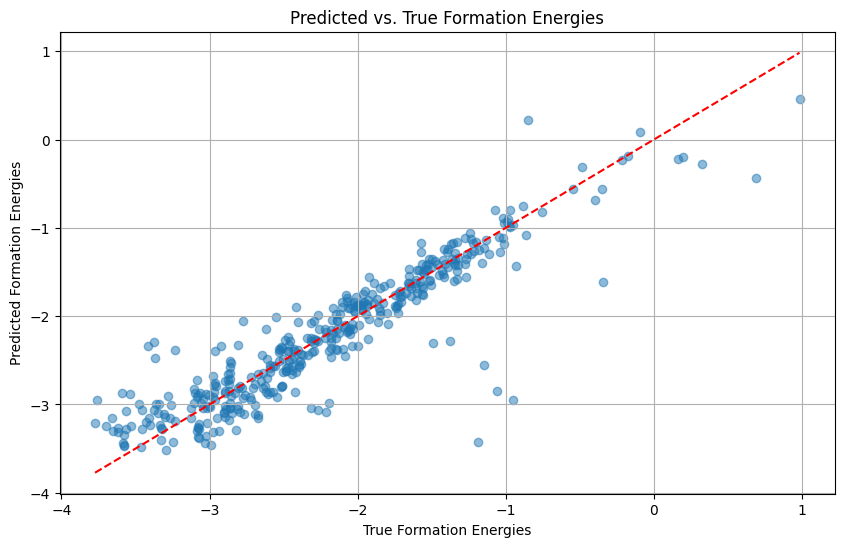

In [133]:
predictions = predictions.flatten()
y_test = np.array(y_test).flatten()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Formation Energies')
plt.ylabel('Predicted Formation Energies')
plt.title('Predicted vs. True Formation Energies')
plt.grid(True)
plt.show()